<h1>Terra-i calibration</h1>

In [23]:
!pip install dbfread
!pip install plotly


    100% |████████████████████████████████| 13.1MB 2.9MB/s eta 0:00:01   24% |███████▊                        | 3.2MB 10.8MB/s eta 0:00:01    27% |█████████                       | 3.7MB 9.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [24]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import plotly


<h2>Introduction</h2>

<p><strong>Coding by:</strong> Paula Andrea Paz </p>

<p><strong>Dataset</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Calibration Terra-i data</h2>

<h3>Input data :</h3>
<p>Terra-i detection </p>
<p>Cluster </p>
<p>Lan cover map</p>
<p>GFC </p>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [3]:
#Analysis land cover by cluster
df = pd.read_csv("coberturas_y_agb.csv", sep=',')
df.head(10)

,Value,Count,coberturas,N40W100_ag
0,1,198.0,11,76
1,2,89.0,2,17
2,3,170.0,2,60
3,4,137.0,2,53
4,5,28.0,11,130
5,6,105.0,2,33
6,7,146.0,2,62
7,8,139.0,2,55
8,9,357.0,11,41
9,10,7.0,7,25


In [12]:
##Analysis land cover by cluster
test=df.groupby(['coberturas']).agg({'N40W100_ag':['min', 'max', 'sum', 'mean']})
test

N40W100_ag                        
                  min  max    sum        mean
coberturas                                   
1                   0  177   1582   31.019608
2                   0  257  27401  117.098291
3                   0  207  16467   90.977901
4                   1  254  32358  128.916335
5                   5  252  31444  133.237288
6                   0  164   7459   62.680672
7                   0  191   8242   66.467742
8                   0  193  10605   74.160839
10                  0  149   4897   51.010417
11                  0  250  26920  116.034483
12                 34  230   5446  181.533333
13                  0   63    307   16.157895
14                  0  225   5380   76.857143
15                  0  206  10777   74.324138
17                  0  236  23528  108.423963

In [45]:
#Analysis land cover by cluster
df = pd.read_csv("carbono_by_cover.csv", sep=',',encoding='latin1')
# df
top_5_land_cover= df.sort_values(by='MEAN',ascending=False).head(5)
# top_5_land_cover
top_5_land_cover[['Cobertura','MIN','MAX','MEAN']]


,Cobertura,MIN,MAX,MEAN
10,Plantaciones de bosque monoespecifico,34,230,183.218750
4,Café,5,252,135.084084
3,Bosque siempre verde,1,254,133.386869
14,Vegetacion secundaria,0,236,83.551026
1,Bosque caducifolio,0,257,74.910822


In [61]:
!pip install rasterio
!pip install show
!pip install earthpy
import rasterio
import show
import earthpy as et
import earthpy.plot as ep

    100% |████████████████████████████████| 1.4MB 10.8MB/s ta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 972kB 6.6MB/s ta 0:00:011
    100% |████████████████████████████████| 13.4MB 3.0MB/s eta 0:00:01  3% |█                               | 430kB 10.8MB/s eta 0:00:02    87% |████████████████████████████    | 11.7MB 9.9MB/s eta 0:00:01
    100% |████████████████████████████████| 1.0MB 12.7MB/s ta 0:00:01    59% |███████████████████▏            | 614kB 7.6MB/s eta 0:00:01
    100% |████████████████████████████████| 14.8MB 2.9MB/s eta 0:00:01   18% |█████▊                          | 2.7MB 11.6MB/s eta 0:00:02
    100% |████████████████████████████████| 10.9MB 6.4MB/s eta 0:00:01   69% |██████████████████████          | 7.5MB 4.2MB/s eta 0:00:01


  Running setup.py bdist_wheel for earthpy ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy
  Found existing installation: numpy 1.13.3
    Uninstalling numpy-1.13.3:
      Successfully uninstalled numpy-1.13.3


In [55]:
!pip install rasterio
!pip install show
import rasterio
import show

# fp = r"D:/ds4a/notebookterra-i\terra-i_el_Salvador\N40W100_agb_ahuachapan.tif"

# Open the file:
raster = rasterio.open('N40W100_agb_ahuachapan.tif')

# Check type of the variable 'raster'
type(raster)

raster.meta

{'driver': 'GTiff',
 'dtype': 'uint32',
 'nodata': 65536.0,
 'width': 493,
 'height': 445,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0008888888888888895, 0.0, -90.13333333333333,
        0.0, -0.0008888888888888882, 14.064)}

In [51]:
array = raster.read()

# Calculate statistics for each band
stats = []

for band in array:
 stats.append({
    'min': band.min(),
    'mean': band.mean(),
    'max': band.max()})
print(stats)

[{'min': 0, 'mean': 28116.60316794676, 'max': 65536}]


In [57]:
raster = rasterio.open('N40W100_agb_ahuachapan.tif')
show(raster)

TypeError: 'module' object is not callable

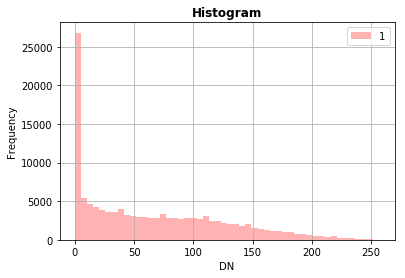

In [58]:
from rasterio.plot import show_hist
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,
histtype='stepfilled', title="Histogram")

In [62]:
ep.plot_bands(raster,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

AttributeError: Input arr should be a numpy array

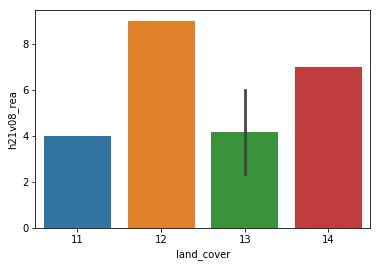

In [7]:
#Plot frecuency land cover by cluster
plt.figure(figsize=(6, 4))
sns.barplot(y='h21v08_rea',x='land_cover',data=test)
plt.show()

In [46]:
#Analysis detections results
df_combine = pd.read_csv("combine_cluster_terra-i_gfc.csv", sep=',')
df_combine.head(10)

,Value,Count,h21v08_re1,h21v08_re2,GCF_sw_eth
0,1,109491.0,8,0,0
1,2,133889.0,13,0,0
2,3,133780.0,10,0,0
3,4,133847.0,12,0,0
4,5,145732.0,6,0,0
5,6,61348.0,4,0,0
6,7,118.0,12,0,1
7,8,61283.0,9,0,0
8,9,95891.0,15,0,0
9,10,123729.0,18,0,0


In [63]:
df_combine.describe()

,Value,Count,h21v08_re1,h21v08_re2,GCF_sw_eth
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,1669.500000,677.164769,9.179748,166.171061,7.837028
std,963.741926,9215.558266,4.831601,113.377067,6.451389
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,835.250000,1.000000,5.000000,50.000000,0.000000
50%,1669.500000,3.000000,11.000000,164.000000,8.000000
75%,2503.750000,9.000000,14.000000,268.000000,14.000000
max,3338.000000,287797.000000,18.000000,376.000000,19.000000


In [64]:
#detection GFC by cluster
gfc_by_cluster= df_combine[(df_combine['h21v08_re1']>1) & (df_combine['GCF_sw_eth']>3)][['h21v08_re1','GCF_sw_eth', 'Count']]

In [78]:
# analize the number of detection from GFW by cluster

test_2=gfc_by_cluster.groupby(['h21v08_re1']).agg({'Count':['sum']})

test_2.columns=test_2.columns.get_level_values(1)

test_2.reset_index(inplace=True)

test_2.sort_values(by='sum',ascending=False).rename(columns={'h21v08_re1':'cluster','sum':'GFC_sum'})

# test_2: show the cluster 5,11,15,18 have more detection of forest change, so you need to define low [recommend between:0.5 to 0.7] threswold 

,cluster,GFC_sum
3,5,8377.0
9,11,6791.0
13,15,3123.0
16,18,1603.0
14,16,1478.0
8,10,1170.0
4,6,1162.0
0,2,910.0
11,13,862.0
5,7,760.0


In [67]:
#detection terra-i by cluster
terra_by_cluster = df_combine[(df_combine['h21v08_re1']>0) & (df_combine['h21v08_re2']>0)][['h21v08_re1','h21v08_re2', 'Count']]

In [71]:
# terra_by_cluster.head()
terra_by_cluster.sort_values(by='Count',ascending=False)

,h21v08_re1,h21v08_re2,Count
117,11,187,5833.0
272,11,94,5504.0
140,11,95,5399.0
119,15,187,5378.0
40,11,188,4424.0
844,1,94,4283.0
185,15,94,4196.0
92,15,188,3779.0
295,11,48,2920.0
234,15,48,2883.0


In [69]:
# analize the number of detection from GFW by cluster

test_3=terra_by_cluster.groupby(['h21v08_re1']).agg({'Count':['sum']})

test_3.columns=test_3.columns.get_level_values(1)

test_3.reset_index(inplace=True)

test_3.sort_values(by='sum',ascending=False).rename(columns={'h21v08_re1':'cluster','sum':'Terrai_sum'})


,cluster,Terrai_sum
5,11,58744.0
7,15,50486.0
3,5,26643.0
0,1,10569.0
4,7,8010.0
6,14,1080.0
8,16,1044.0
1,2,977.0
2,3,181.0
9,17,67.0


In [95]:
#detection terra-i by cluster where GFC doesn't have detections (['GCF_sw_eth']==0).
combine= df_combine[(df_combine['h21v08_re1']>0) & (df_combine['h21v08_re2']>0) & (df_combine['GCF_sw_eth']==0)][['h21v08_re1','h21v08_re2', 'GCF_sw_eth','Count']]
# combine
combine.sort_values(by='Count',ascending=False)


,h21v08_re1,h21v08_re2,GCF_sw_eth,Count
117,11,187,0,5833.0
272,11,94,0,5504.0
140,11,95,0,5399.0
119,15,187,0,5378.0
40,11,188,0,4424.0
844,1,94,0,4283.0
185,15,94,0,4196.0
92,15,188,0,3779.0
295,11,48,0,2920.0
234,15,48,0,2883.0


In [86]:
# analize the number of detection from GFW by cluster

test_4=combine.groupby(['h21v08_re1']).agg({'Count':['sum']})

test_4.columns=test_4.columns.get_level_values(1)

test_4.reset_index(inplace=True)

test_4.sort_values(by='sum',ascending=False).rename(columns={'h21v08_re1':'cluster','sum':'Terrai_sum'})

,cluster,Terrai_sum
5,11,55846.0
7,15,48776.0
3,5,23672.0
0,1,10207.0
4,7,7961.0
6,14,1077.0
8,16,1031.0
1,2,970.0
2,3,181.0
9,17,66.0


In [28]:
#Analysis detections results
df_terra = pd.read_csv("h21v08-real-sw-eth_decrease_2004_01_01_to_2020_05_08.asc.vat.csv", sep=',')
df_terra.head(10)

,Value,Count
0,0,2107326.0
1,1,14.0
2,2,179.0
3,3,1005.0
4,4,1041.0
5,5,111.0
6,6,5.0
7,7,1.0
8,8,1.0
9,10,1.0


In [31]:
df_terra= df_terra[(df_terra['Value']>0)]
df_terra.head(3)

,Value,Count
1,1,14.0
2,2,179.0
3,3,1005.0


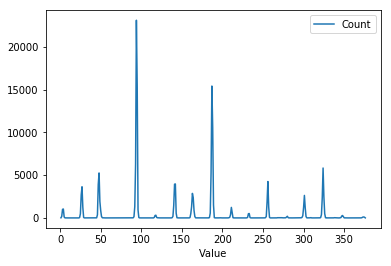

In [34]:
df_terra.plot.line(x='Value', y='Count')

plt.show()

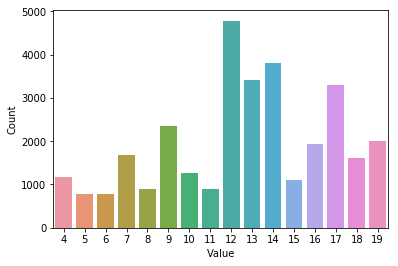

In [41]:
df_gfc = pd.read_csv("GCF_sw-eth.tif.vat.csv", sep=',')

df_gfc= df_gfc[(df_gfc['Value']>3)]

# df_gfc.head()

plt.figure(figsize=(6, 4))
sns.barplot(y='Count',x='Value',data=df_gfc)
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


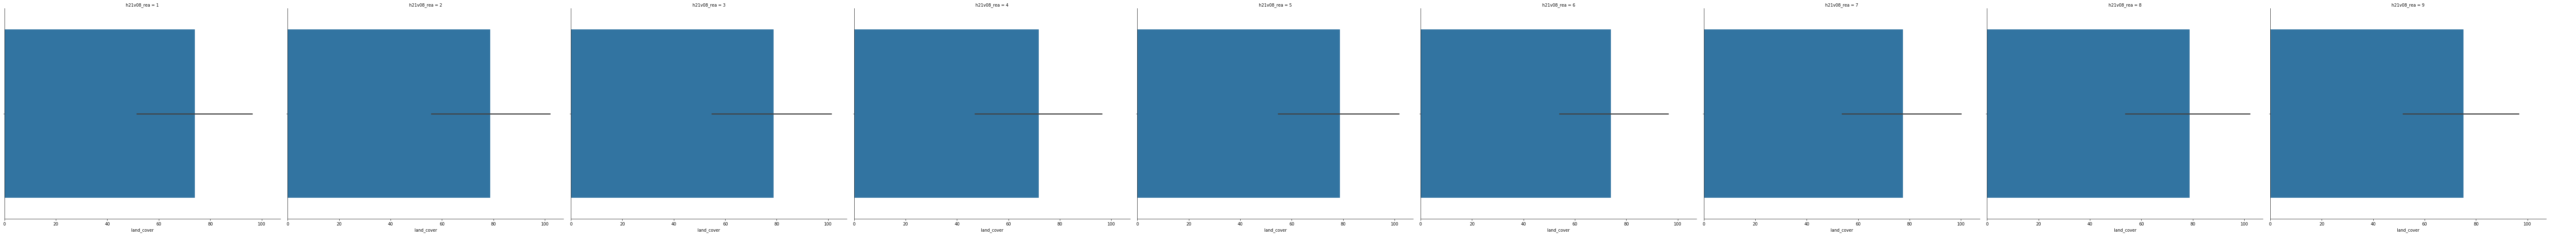

In [10]:
g = sns.FacetGrid(df, col="h21v08_rea",height=8,aspect=1.2)
g.map(sns.barplot, "land_cover")
g.add_legend();
# g.set_axis_labels("HOUR", "COUNT_COLLISION");

<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [4]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

**Answer.**

-------